<h4> Regresja wielu zmiennych

In [1]:
#dane dotyczą samochodow
autompg = read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                     quote = "\"",
                     comment.char = "",
                     stringsAsFactors = FALSE)

In [2]:
print(head(autompg))

  V1 V2  V3    V4   V5   V6 V7 V8                        V9
1 18  8 307 130.0 3504 12.0 70  1 chevrolet chevelle malibu
2 15  8 350 165.0 3693 11.5 70  1         buick skylark 320
3 18  8 318 150.0 3436 11.0 70  1        plymouth satellite
4 16  8 304 150.0 3433 12.0 70  1             amc rebel sst
5 17  8 302 140.0 3449 10.5 70  1               ford torino
6 15  8 429 198.0 4341 10.0 70  1          ford galaxie 500


In [3]:
colnames(autompg) = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name") #nadaje nazwy kolumnom, info: https://archive.ics.uci.edu/dataset/9/auto+mpg

In [5]:
autompg = subset(autompg, autompg$hp != "?") #kasujemy brakujące dane (tam gdzie jest ?)

In [6]:
print(subset(autompg,autompg$name == "plymouth reliant"))

     mpg cyl disp    hp   wt  acc year origin             name
339 27.2   4  135 84.00 2490 15.7   81      1 plymouth reliant
343 30.0   4  135 84.00 2385 12.9   81      1 plymouth reliant


In [7]:
autompg = subset(autompg, autompg$name != "plymouth reliant") #usuwam "playmouth reliant" (m.in zeby nie bylo duplikatow (nazwy wierszy, ale tez inne))

In [8]:
rownames(autompg) = paste(autompg$cyl, "cylinder", autompg$year, autompg$name) #nazywam wiersze

In [9]:
print(head(autompg)) #mpg = miles per gallon (zużycie paliwa)

                                        mpg cyl disp    hp   wt  acc year
8 cylinder 70 chevrolet chevelle malibu  18   8  307 130.0 3504 12.0   70
8 cylinder 70 buick skylark 320          15   8  350 165.0 3693 11.5   70
8 cylinder 70 plymouth satellite         18   8  318 150.0 3436 11.0   70
8 cylinder 70 amc rebel sst              16   8  304 150.0 3433 12.0   70
8 cylinder 70 ford torino                17   8  302 140.0 3449 10.5   70
8 cylinder 70 ford galaxie 500           15   8  429 198.0 4341 10.0   70
                                        origin                      name
8 cylinder 70 chevrolet chevelle malibu      1 chevrolet chevelle malibu
8 cylinder 70 buick skylark 320              1         buick skylark 320
8 cylinder 70 plymouth satellite             1        plymouth satellite
8 cylinder 70 amc rebel sst                  1             amc rebel sst
8 cylinder 70 ford torino                    1               ford torino
8 cylinder 70 ford galaxie 500              

In [10]:
autompg = subset(autompg, select = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year")) #wybieram numeryczne kolumny
print(head(autompg))

                                        mpg cyl disp    hp   wt  acc year
8 cylinder 70 chevrolet chevelle malibu  18   8  307 130.0 3504 12.0   70
8 cylinder 70 buick skylark 320          15   8  350 165.0 3693 11.5   70
8 cylinder 70 plymouth satellite         18   8  318 150.0 3436 11.0   70
8 cylinder 70 amc rebel sst              16   8  304 150.0 3433 12.0   70
8 cylinder 70 ford torino                17   8  302 140.0 3449 10.5   70
8 cylinder 70 ford galaxie 500           15   8  429 198.0 4341 10.0   70


In [11]:
str(autompg)  #struktura danych; hp widzi jako char :/

'data.frame':	390 obs. of  7 variables:
 $ mpg : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl : int  8 8 8 8 8 8 8 8 8 8 ...
 $ disp: num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp  : chr  "130.0" "165.0" "150.0" "150.0" ...
 $ wt  : num  3504 3693 3436 3433 3449 ...
 $ acc : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year: int  70 70 70 70 70 70 70 70 70 70 ...


In [14]:
autompg$hp = as.numeric(autompg$hp) #przerabiam na liczbowe te kolumnę

In [15]:
mpg_model = lm(mpg ~ wt + year, data = autompg)
summary(mpg_model)


Call:
lm(formula = mpg ~ wt + year, data = autompg)

Residuals:
   Min     1Q Median     3Q    Max 
-8.852 -2.292 -0.100  2.039 14.325 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.464e+01  4.023e+00  -3.638 0.000312 ***
wt          -6.635e-03  2.149e-04 -30.881  < 2e-16 ***
year         7.614e-01  4.973e-02  15.312  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.431 on 387 degrees of freedom
Multiple R-squared:  0.8082,	Adjusted R-squared:  0.8072 
F-statistic: 815.6 on 2 and 387 DF,  p-value: < 2.2e-16


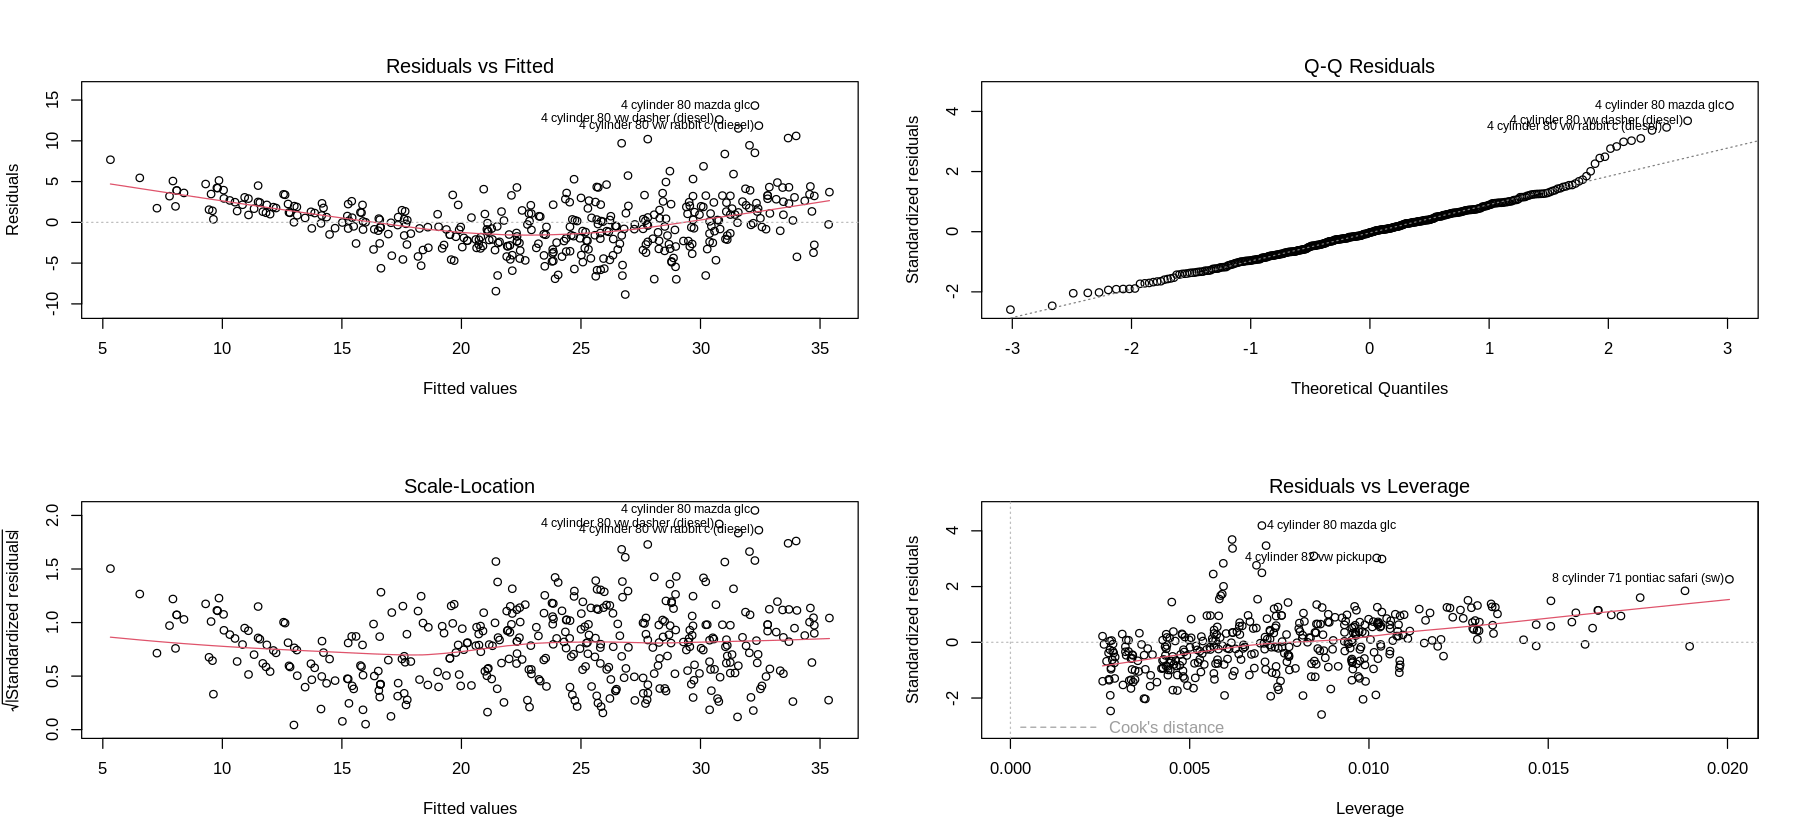

In [20]:
options(repr.plot.width=15, repr.plot.height=7)

par(mfrow = c(2,2));
plot(mpg_model)

In [21]:
summary(mpg_model)$sigma

[1] 3.431367

In [22]:
summary(mpg_model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-14.637641945,4.0233913563,-3.638135,3.118311e-04
wt,-0.006634876,0.0002148504,-30.881372,1.850466e-106
year,0.761401955,0.0497265950,15.311765,1.036597e-41


In [23]:
coef(mpg_model)

(Intercept)            wt          year 
-14.637641945  -0.006634876   0.761401955

In [25]:
#nowa obserwacja (waga (pounds) i rok produkcji)
new_cars = data.frame(wt = c(3500, 5000), year = c(76, 81))
print(new_cars)

    wt year
1 3500   76
2 5000   81


In [26]:
predict(mpg_model, newdata = new_cars, interval = "confidence", level = 0.99) #czy mozemy ufac tym predykcjom?

,fit,lwr,upr
1,20.00684,19.4712,20.54248
2,13.86154,12.3341,15.38898


<h4> Ćwiczenie (we własnym zakresie): Przelicz bezpośrednio otrzymane wartości fit.

In [27]:
range(autompg$wt); range(autompg$year)

[1] 1613 5140

[1] 70 82

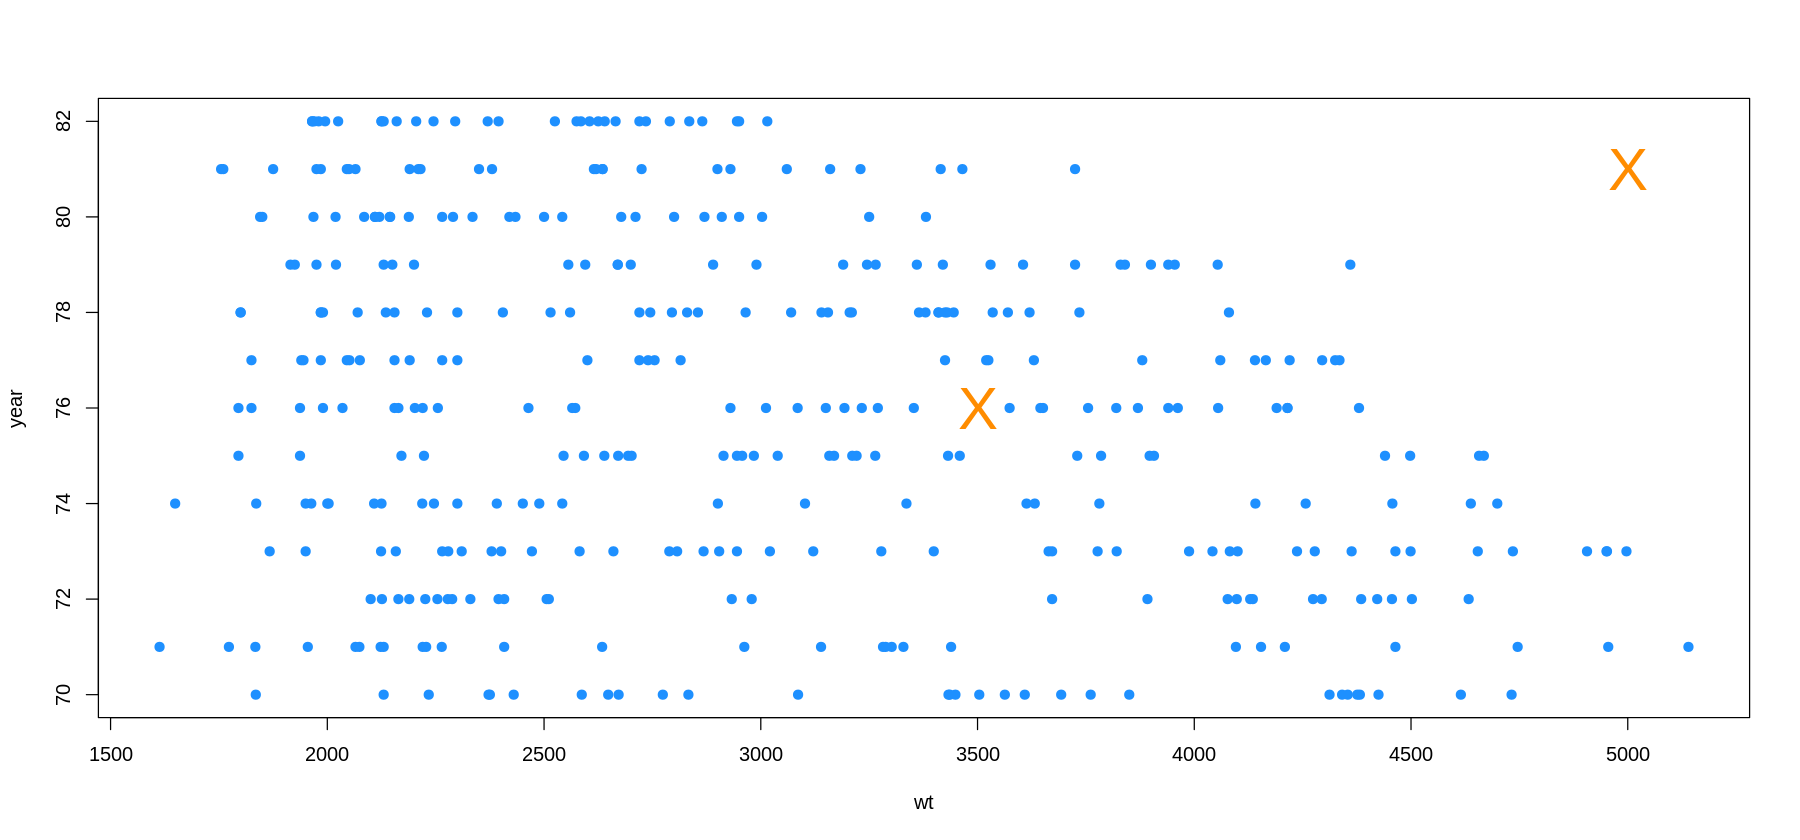

In [29]:
plot(year ~ wt, data = autompg, pch = 20, col = "dodgerblue", cex = 1.5)
points(new_cars, col = "darkorange", cex = 3, pch = "X")

Porównywanie modeli (F-test, anova)

In [30]:
null_mpg_model = lm(mpg ~ 1, data = autompg) #model bez zmiennych
full_mpg_model = lm(mpg ~ wt + year, data = autompg) #model jak poprzednio

print(anova(null_mpg_model, full_mpg_model)) #porownuje dwa modele (domyslnie pierwszy to ten prostszy), p_value male więc wt lub year ma znaczacy wplyw na mpg

Analysis of Variance Table

Model 1: mpg ~ 1
Model 2: mpg ~ wt + year
  Res.Df     RSS Df Sum of Sq      F    Pr(>F)    
1    389 23761.7                                  
2    387  4556.6  2     19205 815.55 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


<h4>
Zadanie1. Dane zawarte w pliku „rosliny.txt” dotyczą badania wpływu zawartości kadmu (Cd, mg/kg), miedzi (Cu, mg/kg) oraz azotu (N, %) w glebie na ilość uzyskanej suchej biomasy roślin (g). Pomiarów dokonano w ramach kontrolowanego doświadczenia polowego. Badanie miało na celu ocenę wpływu zawartości wybranych pierwiastków w glebie na wzrost biomasy roślin, z uwzględnieniem możliwych efektów toksyczności metali ciężkich oraz roli azotu jako podstawowego składnika odżywczego, przy założeniu jednolitych warunków uprawy oraz kontrolowanego środowiska eksperymentalnego.
 
    
- Wyznacz współczynniki korelacji pomiędzy $Cd$ a $Biomass$, $Cu$ a $Biomass$ oraz $N$ a $Biomass$. Zinterpretuj ich znaki i wartości.
- Zbuduj model liniowy, gdzie $Biomass$ zależy od wszystkich pozostałych zmiennych (model1). Które zmienne wydają się istotne?
- Zbuduj model liniowy, gdzie $Biomass$ zależy tylko od zmiennych wytypowanych jako istotne w poprzednim punkcie (model2).
- Za pomocą F testu (polecenie anova) porównaj model1 i model2.
- Skomentuj otrzymane wyniki.


Uwaga: w pkt.3 możesz też zastosować step(model1, trace=0) <-- tworzony jest nowy model



<h4> Kryteria oceny modelu

- kryterium GIC (im mniejsza wartość GIC tym lepszy model); $AIC(stats)$
- współczynnik $R^2$ (jeżeli modele nie różnią się liczbą predyktorów, to im większy $R^2$ tym lepiej)
- statystyka Cp Mallowsa (im mniejsza wartość tym lepszy model); $cp(locfit)$

In [36]:
library(liver) #tu są moje dane
data(cereal)
print(head(cereal))

                       name manuf type calories protein fat sodium fiber carbo
1                 100% Bran     N cold       70       4   1    130  10.0   5.0
2         100% Natural Bran     Q cold      120       3   5     15   2.0   8.0
3                  All-Bran     K cold       70       4   1    260   9.0   7.0
4 All-Bran with Extra Fiber     K cold       50       4   0    140  14.0   8.0
5            Almond Delight     R cold      110       2   2    200   1.0  14.0
6   Apple Cinnamon Cheerios     G cold      110       2   2    180   1.5  10.5
  sugars potass vitamins shelf weight cups   rating
1      6    280       25     3      1 0.33 68.40297
2      8    135        0     3      1 1.00 33.98368
3      5    320       25     3      1 0.33 59.42551
4      0    330       25     3      1 0.50 93.70491
5      8     -1       25     3      1 0.75 34.38484
6     10     70       25     1      1 0.75 29.50954


In [37]:
model1 = lm(rating~calories+protein+shelf, data=cereal)
summary(model1)


Call:
lm(formula = rating ~ calories + protein + shelf, data = cereal)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.225  -5.452  -1.078   3.927  21.063 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 79.94741    5.55832  14.383  < 2e-16 ***
calories    -0.50565    0.04564 -11.078  < 2e-16 ***
protein      6.16014    0.81584   7.551  9.8e-11 ***
shelf        0.49079    1.07776   0.455     0.65    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.716 on 73 degrees of freedom
Multiple R-squared:  0.7102,	Adjusted R-squared:  0.6983 
F-statistic: 59.62 on 3 and 73 DF,  p-value: < 2.2e-16


In [38]:
model2 = lm(rating~calories+protein, data=cereal)
summary(model2)


Call:
lm(formula = rating ~ calories + protein, data = cereal)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8461  -5.5013  -0.9633   3.7361  20.4813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.69321    5.28303   15.27  < 2e-16 ***
calories    -0.50367    0.04519  -11.14  < 2e-16 ***
protein      6.20943    0.80428    7.72 4.37e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.675 on 74 degrees of freedom
Multiple R-squared:  0.7094,	Adjusted R-squared:  0.7015 
F-statistic:  90.3 on 2 and 74 DF,  p-value: < 2.2e-16


In [39]:
AIC(model1); AIC(model2) #nie ma korzysci z uzywania zmiennej shelf

[1] 539.0817

[1] 537.3001

<h4> Ćwiczenie (we własnym zakresie): Zbuduj model liniowy, opisujący $rating$ poprzez $sugars$ i $fiber$. Następnie:

- Wyznacz obserwacje odstające (za pomocą metody outlierTest). Ile ich jest?
- Wyznacz obserwacje wpływowe (za pomocą metody influence.measures). Ile ich jest?
    
Następnie zbuduj model liniowy, opisujący $rating$ tylko od $sugars$. Czy model ten istotnie różni się od poprzedniego (zmienna $fiber$ wnosi istotny wkład do modelu)? Wykorzystaj anova i AIC.

Dane do zadania poniżej: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE67462

<h4> Zadanie2: Btbd8, Dars2 oraz Cnbp to przykłady genów regulowanych przez czynnik transkrypcyjny Oct4. Rozważ eksperyment GSE67462 (NCBI GEO). Dotyczył on
procesu wtórnego reprogramowania komórek somatycznych myszy do stanu pluripotentnego przy użyciu czynników transkrypcyjnych, w tym Oct4. 

- Pobierz wartości ekspresji genów Btbd8, Dars2 oraz Cnbp dnia 0, 1, 3, 5, 7, 11, 15 oraz 18. Dla danego dnia uśrednij wynik z dwóch powtórzeń.
- Wyznacz współczynnik korelacji pomiędzy Btbd8/Dars2 oraz Btbd8/Cnbp. Zinterpretuj jego znak i wielkość.
- Zbuduj model liniowy, modelując ekspresję genu Btbd8 na podstawie ekspresji Dars2 oraz Cnbp. Czy oszacowane współczynniki są istotne statystycznie. Ile wynosi $R^2$ dla tego modelu. Narysuj wykres między rzeczywistymi a przewidywanymi eskpresjami Btbd8.
- Jak należy interpretować taki model?

Poniższe zadanie wzorowane jest na(dane częściowo zmienione):
* https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE67462
* https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE67520
* https://www.frontiersin.org/articles/10.3389/fgene.2019.00120/full

<h4> Zadanie3: Rozważ dane_seq.csv. Dotyczą one 3 genów - A, B oraz C z 20 chwil czasowych (dni). Pochodzą one z eksperymentów związanych z procesem reprogramowania komórek do stanu podobnego do pluripotentnego. Analizowany był udział Oct4 w kontekście przywracania pluripotencji. Dokładniej mamy

* eskpresje tych genów w kolejnych chwilach czasowych
* pewne wskaźniki (dane z Chip-seq) dotyczace regulacji ekspresji rozważanych genów przez Oct4: H (wysokość piku), W (szerokość), D (odległość od miejsca początku transkrypcji)

Celem jest zbudowanie modelu przewidującego ekspresję genu na podstawie czasu oraz H, D, W. 

Uwaga: Przy budowie modelu rozważ kombinacje cech typu $\lbrace{t, k^t, \log t }\rbrace \times \lbrace{D, W, H}\rbrace$, gdzie $k$ pewna stała z przedziału $(0,1)$. Postać modelu powinna być ta sama dla każdego z genów $A$, $B$ oraz $C$ ($R^2$ min. 0.9, wszystkie współczynniki istotne przy poziomie $\alpha = 0.06%$). Współczynniki dla każdego genu mogą być (i zapewne będą) inne.

Zinterpretuj finalny model. Zastanów się nad interpretacją wybranych kombinacji - jak interpretować iloczyn wskaźników z Chip-seq i wybranych funkcji czasu oraz jaki mają wpływ na ostateczną predykcję.

<h4> Współliniowość zmiennych objaśniających

$VIF_{j} = \frac{1}{1-R_{j}^2}$, gdzie $R_{j}^{2}$ - współczynnik determinacji j-tej zmiennej przez pozostałe zmienne objaśniające

Uwagi:
- nie uwzględnia $y$
- bada się tylko skorelowanie zmiennych objaśniających
- im $R_{j}^{2}$ większe tym mianownik mniejszy i $VIF_{j}$ większy, co oznacza silną korelacje
- w przypadku braku korelacji $VIF_{j} = 1$ ($R_{j}^{2}=0)$

Co można zrobić?

- usunąć wybrane zmienne (te najbardziej skorelowane) -> efekt: zmniejszenie VIF pozostałych zmiennych
- zastosować metodę redukcji zmiennych (np PCA)
- wprowadzić ograniczenia na parametry modelu

In [41]:
x1 = runif(100)
x2 = runif(100)
x3 = 2*x1+4*x2 + rnorm(100, 0, 0.5) #x3 to kombinacja x1 i x2 z pewnym elementem losowym
y = runif(100)

d = data.frame(x1=x1, x2=x2, x3=x3, y=y)
print(head(d))

         x1        x2       x3         y
1 0.9544290 0.7333761 4.839411 0.1641444
2 0.2325348 0.9889702 4.883306 0.5093819
3 0.1073061 0.7492450 2.734323 0.9783580
4 0.6610806 0.1366581 1.912088 0.1227345
5 0.9525170 0.5350130 4.569834 0.4426967
6 0.8688252 0.9549438 5.532790 0.9874395


In [44]:
library(car)
vif(lm(y~., data = d))

Loading required package: carData



x1       x2       x3 
3.076895 4.695258 6.703726

In [45]:
vif(lm(y~x1+x2, data = d)) #po usunięciu x3

x1       x2 
1.000151 1.000151

<h4> Co gdy liczba regresorów porównywalna z liczbą obserwacji?

In [1]:
y = rnorm(100)
X = matrix(rnorm(9800), 100, 98)

In [ ]:
summary(lm(y~X))$r.squared; summary(lm(y~X))$adj.r.squared #ekstrakcja samego Multiple R-squared czy Adjusted R-squared

[1] 0.9980469

[1] 0.8066393

<h4> Ćwiczenie (we własnym zakresie): Rozważ $y$ jak poprzednio. Następnie wygeneruj zmienne $X$, przy czym liczbę cech zmieniaj od 1 do 100. Narysuj wykres zależności: Multiple R-squared oraz Adjusted R-squared od liczby cech. Skomentuj otrzymany wynik.

<h4> Zmienne kategoryczne

In [47]:
library(MASS)

In [48]:
print(head(survey))

     Sex Wr.Hnd NW.Hnd W.Hnd    Fold Pulse    Clap Exer Smoke Height      M.I
1 Female   18.5   18.0 Right  R on L    92    Left Some Never 173.00   Metric
2   Male   19.5   20.5  Left  R on L   104    Left None Regul 177.80 Imperial
3   Male   18.0   13.3 Right  L on R    87 Neither None Occas     NA     <NA>
4   Male   18.8   18.9 Right  R on L    NA Neither None Never 160.00   Metric
5   Male   20.0   20.0 Right Neither    35   Right Some Never 165.00   Metric
6 Female   18.0   17.7 Right  L on R    64   Right Some Never 172.72 Imperial
     Age
1 18.250
2 17.583
3 16.917
4 20.333
5 23.667
6 21.000


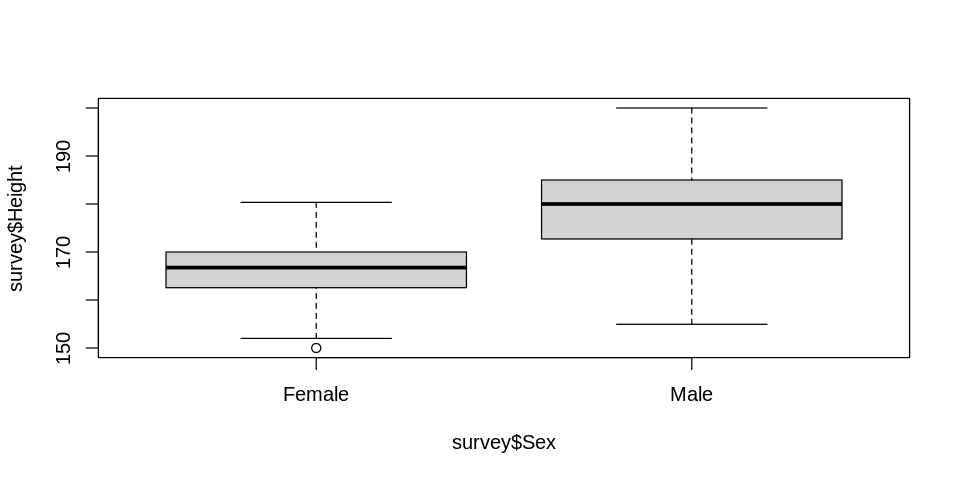

In [49]:
options(repr.plot.width=8, repr.plot.height=4)
plot(survey$Height~survey$Sex)

In [50]:
means.sex = tapply(survey$Height,INDEX=survey$Sex,FUN=mean,na.rm=TRUE)
means.sex

Female     Male 
165.6867 178.8260

In [51]:
survfit <- lm(Height~Sex,data=survey) #wsp dobre ale R^2 slabe; y =ax+b, gdzie x=0 -> kobieta, x=1 -> mezczyzna
summary(survfit)


Call:
lm(formula = Height ~ Sex, data = survey)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.886  -5.667   1.174   4.358  21.174 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  165.687      0.730  226.98   <2e-16 ***
SexMale       13.139      1.022   12.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.372 on 206 degrees of freedom
  (29 observations deleted due to missingness)
Multiple R-squared:  0.4449,	Adjusted R-squared:  0.4422 
F-statistic: 165.1 on 1 and 206 DF,  p-value: < 2.2e-16


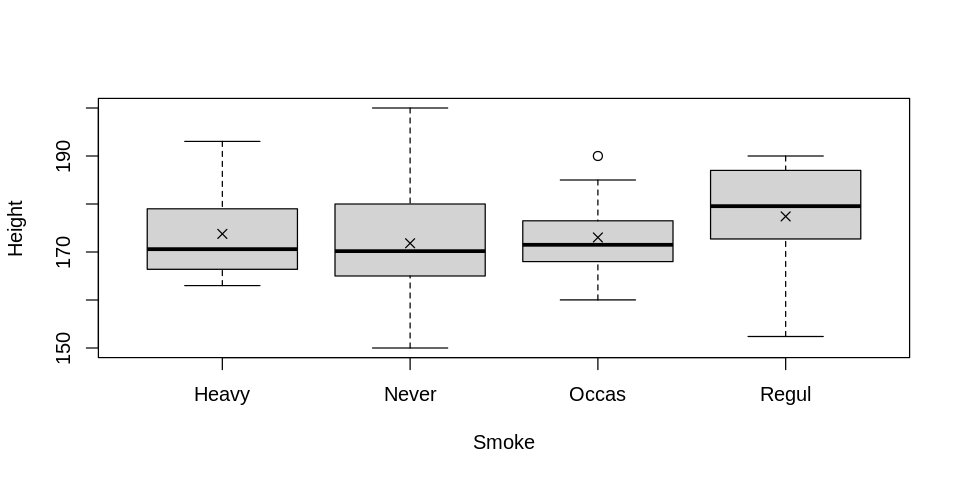

In [52]:
boxplot(Height~Smoke,data=survey)
points(1:4,tapply(survey$Height,survey$Smoke,mean,na.rm=TRUE),pch=4)

In [53]:
tapply(survey$Height,INDEX=survey$Smoke,FUN=mean,na.rm=TRUE)

Heavy    Never    Occas    Regul 
173.7720 171.8200 173.0288 177.4171

In [54]:
survfit2 <- lm(Height~Smoke,data=survey) #Heavy siedzi w wyrazie wolnym
summary(survfit2)


Call:
lm(formula = Height ~ Smoke, data = survey)

Residuals:
   Min     1Q Median     3Q    Max 
-25.02  -6.82  -1.64   8.18  28.18 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 173.7720     3.1028  56.005   <2e-16 ***
SmokeNever   -1.9520     3.1933  -0.611    0.542    
SmokeOccas   -0.7433     3.9553  -0.188    0.851    
SmokeRegul    3.6451     4.0625   0.897    0.371    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.812 on 205 degrees of freedom
  (28 observations deleted due to missingness)
Multiple R-squared:  0.02153,	Adjusted R-squared:  0.007214 
F-statistic: 1.504 on 3 and 205 DF,  p-value: 0.2147


<h4> Ćwiczenie (we własnym zakresie): Wyjaśnij skąd wzięły się wartości współczynników w powyższym modelu.

* Zmienna może być czasem traktowana zarówno jak numeryczna jak i kategoryczna - to ma znaczenie!

In [55]:
print(head(mtcars))

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


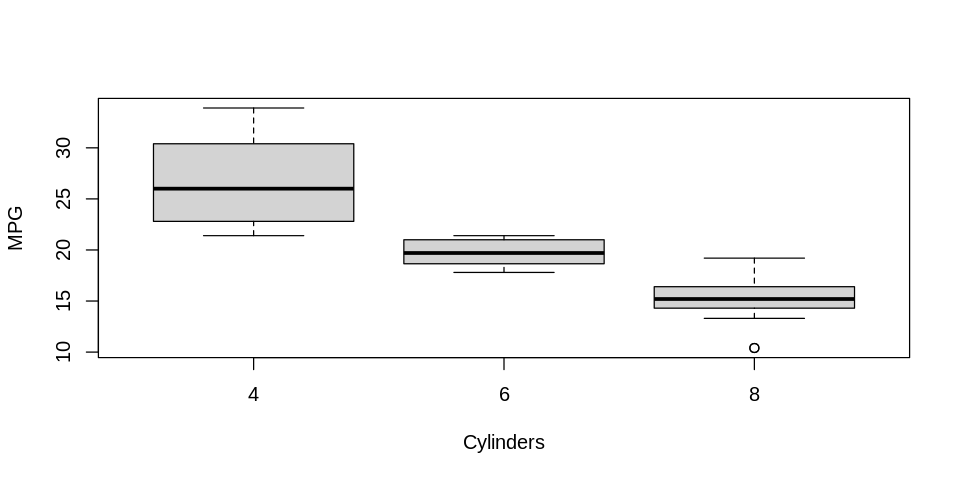

In [56]:
boxplot(mtcars$mpg~mtcars$cyl, xlab="Cylinders", ylab="MPG") #traktujemy cyl jak zmienną numeryczna

In [57]:
carfit <- lm(mpg~cyl,data=mtcars)
summary(carfit)


Call:
lm(formula = mpg ~ cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9814 -2.1185  0.2217  1.0717  7.5186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.8846     2.0738   18.27  < 2e-16 ***
cyl          -2.8758     0.3224   -8.92 6.11e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.206 on 30 degrees of freedom
Multiple R-squared:  0.7262,	Adjusted R-squared:  0.7171 
F-statistic: 79.56 on 1 and 30 DF,  p-value: 6.113e-10


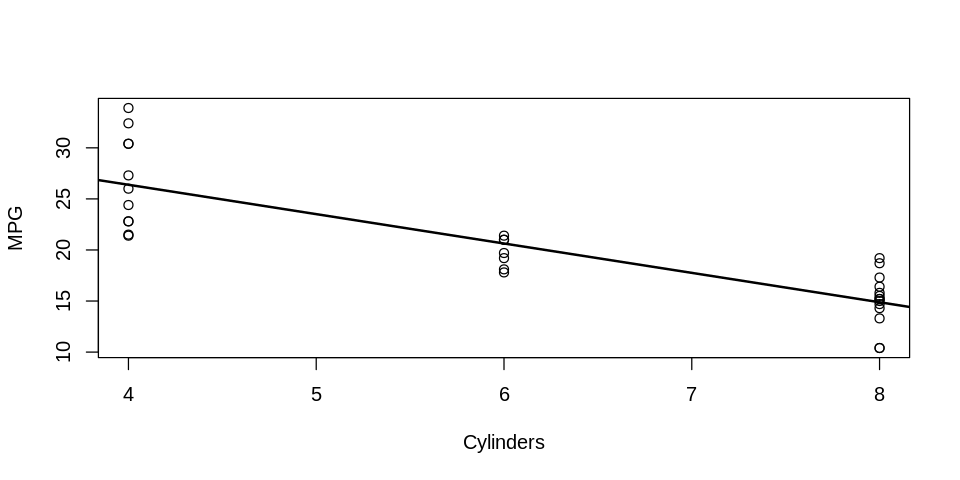

In [58]:
plot(mtcars$mpg~mtcars$cyl, xlab="Cylinders", ylab="MPG")
abline(carfit,lwd=2)

In [59]:
#jezeli chcemy traktowac jako Factor
carfit <- lm(mpg~factor(cyl), data=mtcars)
summary(carfit)


Call:
lm(formula = mpg ~ factor(cyl), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2636 -1.8357  0.0286  1.3893  7.2364 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   26.6636     0.9718  27.437  < 2e-16 ***
factor(cyl)6  -6.9208     1.5583  -4.441 0.000119 ***
factor(cyl)8 -11.5636     1.2986  -8.905 8.57e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.223 on 29 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.714 
F-statistic:  39.7 on 2 and 29 DF,  p-value: 4.979e-09


In [60]:
print(factor(mtcars$cyl))

 [1] 6 6 4 6 8 6 8 4 4 6 6 8 8 8 8 8 8 4 4 4 4 8 8 8 8 4 4 4 8 6 8 4
Levels: 4 6 8


In [ ]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
tapply(mtcars$mpg,mtcars$cyl, mean)

4        6        8 
26.66364 19.74286 15.10000

<h3> Uzupełnienie: Jeszcze raz ANOVA

ANOVA jednoczynnikowa a regresja liniowa z jedną zmienną kategoryczną

In [90]:
data = data.frame(x = c(20, 23, 26, 21, 34, 32, 35, 42, 45, 47), group = c(rep("A", 4),rep("B",3), rep("C",3)))
print(head(data))

   x group
1 20     A
2 23     A
3 26     A
4 21     A
5 34     B
6 32     B


In [91]:
summary(data)

       x            group          
 Min.   :20.00   Length:10         
 1st Qu.:23.75   Class :character  
 Median :33.00   Mode  :character  
 Mean   :32.50                     
 3rd Qu.:40.25                     
 Max.   :47.00                     

In [92]:
model = lm(x~group,data=data)
summary(model)


Call:
lm(formula = x ~ group, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6667 -1.6250  0.3333  1.1250  3.5000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   22.500      1.170  19.230 2.56e-07 ***
groupB        11.167      1.787   6.248 0.000425 ***
groupC        22.167      1.787  12.402 5.09e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.34 on 7 degrees of freedom
Multiple R-squared:  0.9568,	Adjusted R-squared:  0.9444 
F-statistic: 77.44 on 2 and 7 DF,  p-value: 1.681e-05


In [93]:
summary(aov(x~group,data=data))

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2  848.2   424.1   77.44 1.68e-05 ***
Residuals    7   38.3     5.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [95]:
sqrt(5.5) #to residual standard error: 2.34

[1] 2.345208

<h4> Rachunki

In [96]:
N = length(data$x)
N

[1] 10

In [97]:
srednia = mean(data$x) #srednia ze wszystkich
srednia

[1] 32.5

In [98]:
srednie_g = tapply(data$x, data$group, mean) #srednie w grupach
srednie_g

A        B        C 
22.50000 33.66667 44.66667

In [99]:
k = 3 #liczba grup

In [100]:
ile = tapply(data$x, data$group, length)
ile

A B C 
4 3 3

In [101]:
sum_sq = sum(ile*(srednie_g - srednia)**2)
MSTR = sum_sq / (k-1)

sum_sq; MSTR

[1] 848.1667

[1] 424.0833

In [102]:
s1 = data[data$group == "A",]$x
s2 = data[data$group == "B",]$x
s3 = data[data$group == "C",]$x

In [104]:
sum_sq2 = sum((s1 - srednie_g[1])**2) + sum((s2 - srednie_g[2])**2) + sum((s3 - srednie_g[3])**2)
MSE = sum_sq2/(N-k)
sum_sq2; MSE

[1] 38.33333

[1] 5.47619

In [105]:
F = MSTR/MSE #przy pewnych załozeniach F ma rozkład F–Snedecora z (k−1, n−k) stopniami swobody. Jezeli F duze (dokładniej F >= Fkn) to odrzucamy H0
F

[1] 77.4413

Kiedy F duże? Gdy licznik duży (różnice pomiedzy grupami duże) lub mianownik mały (dane slabo rozrzucone w obrębie grup)